<h1><center> Statistics and Data Analysis - Assignmet 02</center></h1>

# Question 1.

    a. Produce histograms that compare the distribution of max heart rate using all non numerical columns to
    partition the set of samples.  State 2 conclusions you can try to draw from this analysis. 

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [176]:
%matplotlib inline

In [177]:
lyon=pd.read_excel("./HW2/UnivLyon_heart_disease_male.xls")
lyon.head()

,age,chest_pain,rest_bpress,blood_sugar,rest_electro,max_heart_rate,exercice_angina,disease
0,43,asympt,140,f,normal,135,yes,positive
1,39,atyp_angina,120,f,normal,160,yes,negative
2,39,non_anginal,160,t,normal,160,no,negative
3,42,non_anginal,160,f,normal,146,no,negative
4,49,asympt,140,f,normal,130,no,negative


In [178]:
# categories_to_split_by = filter(lambda cat: str(lyon[cat][0]).isalpha(), lyon)
# fig, axes = plt.subplots(nrows=len(categories_to_split_by), ncols=1)
# plt.rcParams["figure.figsize"]=50,50
# plt.rcParams["font.size"]=20
# plt.rcParams["axes.titlesize"]=20



# for i in range(len(categories_to_split_by)):
#     df = lyon[['max_heart_rate', categories_to_split_by[i]]]
#     nf = np.array(df.groupby(categories_to_split_by[i]).max_heart_rate, dtype=pd.Series)
#     axes[i].hist([x[1] for x in nf], label=[x[0] for x in nf])
#     axes[i].set_ylabel("Num of elements")
#     axes[i].set_xlabel("Max heart rate")
#     axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.05))


# fig.subplots_adjust(hspace=2, left=0.05)
# plt.show()

In [179]:
# axarr = df.groupby('chest_pain').max_heart_rate.hist(alpha=0.4)

## Question 2
    a. First we start by showing the pdf of Fred, Mel and Sid time to repair a phonel.

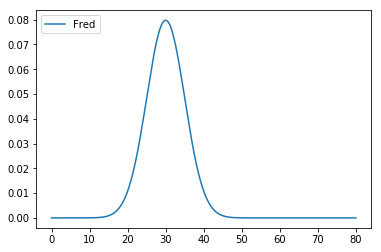

In [180]:
x_axis = np.arange(0, 80, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,30,5), label='Fred')
plt.legend(loc='upper left')
plt.show()

We want to calculte $P (F \leq 45)$ = $\phi(\frac{45 - 30}{5}) = \phi(3)$ where $\phi$ is the pdf of of the stanard normal distribution. therefore we shall calculate:

In [181]:
norm.cdf(3)

0.9986501019683699

We can say that the probability that Fred will be done fixing the phone by 11:45 is $99.86\%$

When a customer in North Randomistan orders a repair, there is a 50% chance Fred will do the work and 25% each that Mel or Sid will do the work.

    b. What is the distribution of the duration of repair in North Randomistan?

The distribution of the duration of repair in North Randomistan is a Gaussian mixture with the following parameters:

$ X_1 \sim N(30, 5), X_2 \sim N(35, 7), X_3 \sim N(40, 10) $
$w_1 = 0.5, w_2 = 0.25, w_3 = 0.25$

we define the Gaussian mixture PDF as:
$$ GM(x) = \sum_{i=1}^{3} w_i f_{X_i}(x)$$

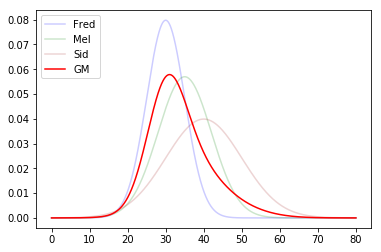

In [182]:
def gm_pdf(x):
    return 0.5 * norm.pdf(x,30,5) + 0.25 * norm.pdf(x,35,7) + 0.25 * norm.pdf(x,40,10)

plt.plot(x_axis, norm.pdf(x_axis,30,5), color='blue', label='Fred', alpha=0.2)
plt.plot(x_axis, norm.pdf(x_axis, 35, 7), color='green', label='Mel', alpha=0.2)
plt.plot(x_axis, norm.pdf(x_axis,40,10), color='brown', label='Sid', alpha=0.2)
plt.plot(x_axis, gm_pdf(x_axis), color='red', label='GM')
plt.legend(loc='upper left')
plt.show()

c. Let $\Phi$ denote the CDF of a standard normal random variable. Use $\Phi$ to express the CDF of the duration of a repair in North Randomistan.

$\Phi_{gm}(x) = \int_{-\infty}^{x} GM(x)dx = \int_{-\infty}^{x} \sum_{i=1}^{3} w_i f_{X_i}(x)dx = \sum_{i=1}^{3}  w_i \int_{-\infty}^{x} f_{X_i}(x)dx = \sum_{i=1}^{3} w_i \Phi_{X_i}(x) = \sum_{i=1}^{3} w_i \Phi(\frac{x - \mu_i}{\sigma_i}) $ 

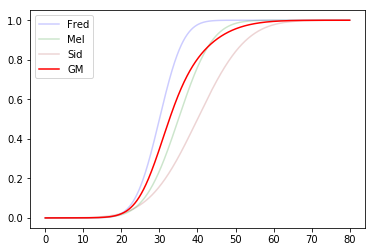

In [183]:
def gm_cdf(x):
    return 0.5 * norm.cdf(x,30,5) + 0.25 * norm.cdf(x,35,7) + 0.25* norm.cdf(x,40,10)

plt.plot(x_axis, norm.cdf(x_axis,30,5), color='blue', label='Fred', alpha=0.2)
plt.plot(x_axis, norm.cdf(x_axis, 35, 7), color='green', label='Mel', alpha=0.2)
plt.plot(x_axis, norm.cdf(x_axis,40,10), color='brown', label='Sid', alpha=0.2)
plt.plot(x_axis, gm_cdf(x_axis), color='red', label='GM')
plt.legend(loc='upper left')
plt.show()

d. If the repair starts at 11AM, what is the earliest time for which the customer can assume, at a 95% certainty, that the repair will be already done?

we want to find the earliest time $t$ such that $\Phi_{gm}(t) \geq 0.95$, in this simple case, we will answer that by iterating over the discrete values

In [187]:
for t in range(0, 80):
    if gm_cdf(t) >= 0.95:
        print('gm_cdf({}) = {}'.format(t, gm_cdf(t)))
        break
        

gm_cdf(50) = 0.956304779495262


we can conclude that for every $t \geq 50$ (actually somewhere between 49 and 50) it holds that $$\Phi_{gm}(t) \geq \Phi_{gm}(50) \geq 0.95$$